In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
from keras.preprocessing import image


Using TensorFlow backend.


In [ ]:
train.head()

In [3]:
train=pd.read_csv('train.csv').values

In [5]:
train.shape


(304, 2)

In [6]:
train[0][0]

'296.jpg'

In [7]:
poke_dict={'Pikachu':0,'Bulbasaur':1,'Charmander':2}

In [8]:
poke_dict[train[150][1]]

1

In [9]:
images=[]
labels =[]
path='Images/'
for i in range(train.shape[0]):
    image_path=path+train[i][0]
    img=image.load_img(image_path,target_size=(120,120,3))
    img_arr=image.img_to_array(img)
    images.append(img_arr)
    l=poke_dict[train[i][1]]
    labels.append(l)

c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
print(len(images),len(labels))

304 304


In [11]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
import random
combined = list(zip(images,labels))
random.shuffle(combined)

images[:],labels[:] = zip(*combined)

In [13]:
labels[:10]

[0, 0, 0, 0, 1, 1, 1, 2, 1, 1]

In [14]:
images[1].shape

(120, 120, 3)

In [15]:
X_train = np.array(images)
y_train = np.array(labels)

In [16]:
X_train.shape

(304, 120, 120, 3)

In [17]:
from keras.utils import np_utils 

In [18]:
y_c=np_utils.to_categorical(y_train)

In [19]:
from keras.layers import *
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(Conv2D(64,(5,5),input_shape=(120,120,3)))
model.add(MaxPooling2D((4,4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(28,(3,3)))
model.add(MaxPooling2D((2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Activation('relu'))
#model.add(MaxPooling2D((2,2)))
#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

W0404 00:04:28.243087  9156 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0404 00:04:29.102046  9156 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0404 00:04:29.428010  9156 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0404 00:04:29.810983  9156 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 116, 116, 64)      4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 28)        16156     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
__________

In [21]:
from keras.optimizers import Adam
adam=Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])


W0404 00:04:37.861254  9156 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [26]:
hist=model.fit(X_train,y_c,epochs=2,batch_size=32) #9 epochs

Epoch 1/2
304/304 [==============================] - 6s 21ms/step - loss: 0.1254 - acc: 0.9441
Epoch 2/2
304/304 [==============================] - 6s 21ms/step - loss: 0.1346 - acc: 0.9441


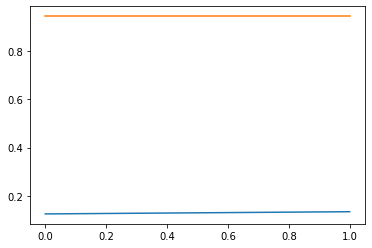

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.show()

In [29]:
import pickle

In [32]:
model.save('classifypokemon.h5')

In [33]:
from keras.models import load_model
m=load_model('classifypokemon.h5')

In [34]:
pickle.dump(m,open('model2.pkl','wb'))

In [28]:
test=pd.read_csv('test/test.csv').values

In [50]:
test_images=[]
#labels =[]
path='test/Images/'
for i in range(test.shape[0]):
    image_path=path+test[i][0]
    img=image.load_img(image_path,target_size=(120,120,3))
    img_arr=image.img_to_array(img)
    test_images.append(img_arr)
    #l=poke_dict[train[i][1]]
    #labels.append(l)
    

In [51]:
X_test= np.array(test_images)

In [105]:
X_test.shape


(123, 120, 120, 3)

In [158]:
predictions=[]
for i in range(len(pred)):
    m=np.argmax(pred[i])
    predictions.append(m)
    #print(m)

In [76]:
poke_index={0:'Pikachu',1:'Bulbasaur',2:'Charmander'}

In [160]:
predictions[2]

1

In [161]:
index_pred=[]
for i in range(len(predictions)):
    index_pred.append(poke_index[predictions[i]])

In [162]:
len(index_pred)

123

In [163]:
u=np.unique(predictions,return_counts=True)

In [164]:
u

(array([0, 1, 2], dtype=int64), array([32, 41, 50], dtype=int64))

In [151]:
type(test[:,0])

numpy.ndarray

In [152]:
index_pred=np.array(index_pred)

In [153]:
submit=pd.DataFrame({'ImageId':test[:,0],'NameOfPokemon':index_pred})
submit.to_csv('predictions1.csv',index=False)

In [154]:
submit.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
